<a href="https://colab.research.google.com/github/MarcosTorres978/Atividades_Aprofundamento_PLP/blob/main/Trilha_1_Zipf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício de aprofundamento - Trilha 1 - Zipf


In [ ]:
import string

#------------------------------------------------------------------------
# Variáveis
# https://irias.com.br/blog/como-ler-escrever-arquivo-com-python/

filecontent = []
listaEliminaNovasLinhas = []
listaDefinitiva = []
dicionario_quantidade = {}
dicionario_quantidade_organizado = {}
count = 0

#------------------------------------------------------------------------
# Abertura do arquivo
fileopen = open('/content/input.txt','r')

#------------------------------------------------------------------------
# Carrega o arquivo na lista filecontent fazendo split por espaço em branco
# Cria uma matriz ou lista aninhada (listas dentro de lista) eliminando os espaços no texto
for fileline in fileopen:
  filecontent.append(fileline.split(' '))

#------------------------------------------------------------------------
# Fecha o arquivo
fileopen.close()

print(type(filecontent))

#------------------------------------------------------------------------
# Quebra as listas aninhadas e faz tudo uma lista só eliminando o caractere para nova linha (\n)
# Carrega os dados na listaEliminaNovasLinhas com strip e split
# (https://algoritmosempython.com.br/cursos/programacao-python/listas/)
for lista in filecontent:
  for elemento in lista:  
    elemento = elemento.lower() # para unicidade, copiado do modelo do professor
    if elemento == " ":
      print("Vazio: ", elemento)
    #print(elemento)
    listaEliminaNovasLinhas.extend(elemento.strip().split('\n'))
#print(listaEliminaNovasLinhas)

#------------------------------------------------------------------------
# Remove pontuação e carrega na lista listaDefinitiva
#https://www.pythonpool.com/remove-punctuation-python/
def remove_punc(string):
    #punc = '''!()[]{};:'"\,<>./?@#$%^&*_~''' # Alterado, removidos espaço e '-'
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*—_~''' # Alterado
    #punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~''' # Original
    for ele in string:
      if ele in punc:
        string = string.replace(ele, "")
    return string
 
listaDefinitiva = [remove_punc(i) for i in listaEliminaNovasLinhas]


#print(listaDefinitiva)

#------------------------------------------------------------------------
# Tratamento da lista para contagem de palavras
# Feito com base na questão 2 do Exercício de fixação da trilha 1 ( Quatro letras que mais aparecem na lista letras )
def count(listaDefinitiva, palavra):  # Função, recebe a lista listaDefinitiva como parâmetro 
  count = 0                           # e a palavra da lista listaDefinitiva que se está pesquisando
  for busca in listaDefinitiva:       # e retorna o total de ocorrências da palavra
    count = listaDefinitiva.count(palavra)
    return count           

for i in range(len(listaDefinitiva)): # percorre a lista organizada listaDefinitiva
  total = count(listaDefinitiva, listaDefinitiva[i])  # chama a função count e recebe o total por palavra
  dicionario_quantidade [listaDefinitiva[i]] = total # popula o dicionario_quantidade com a palavra e total de ocorrências
#print(dicionario_quantidade)

#------------------------------------------------------------------------
# Sort do dicionário em ordem crescente de totais das palavras
# https://www.tutorialspoint.com/how-to-sort-a-dictionary-in-python
for i in sorted(dicionario_quantidade):
   dicionario_quantidade_organizado[i]=dicionario_quantidade[i]

dicionario_quantidade_organizado=dict(sorted(dicionario_quantidade.items(),key= lambda x:x[1]))
print(dicionario_quantidade_organizado)
print(len(listaDefinitiva))
print(len(listaEliminaNovasLinhas))

print(type(dicionario_quantidade_organizado))

for palavra, quantidade in dicionario_quantidade_organizado.items():
     print(palavra, quantidade)

<class 'list'>
{'httpsgaeacombroquesaomainframes': 1, '2000': 1, 'previase': 1, 'chegaria': 1, 'fim': 1, 'surpresa': 1, 'desenvolveu': 1, 'assumiu': 1, 'formas': 1, 'delas': 1, 'trabalha': 1, 'organização': 1, 'encontrar': 1, 'estar': 1, 'perguntando': 1, 'meu': 1, 'negócio': 1, 'neste': 1, 'saberá': 1, 'assunto': 1, 'fins': 1, 'exige': 1, 'menor': 1, 'permitem': 1, '9999': 1, 'começou': 1, 'naquela': 1, 'época': 1, 'apelidados': 1, 'ocupavam': 1, 'espaço': 1, 'usados': 1, 'aquelas': 1, 'envolvidas': 1, 'seguintes': 1, 'estatísticas': 1, 'cálculo': 1, 'censo': 1, 'empresariais': 1, 'campos': 1, 'moderno': 1, '3': 1, 'metros': 1, 'parecido': 1, 'geladeira': 1, 'antigamente': 1, 'chamados': 1, 'levam': 1, 'classificados': 1, 'comerciais': 1, 'atualmente': 1, 'trabalhando': 1, 'arduamente': 1, 'tarefas': 1, 'tradicionalmente': 1, 'faziam': 1, 'trata': 1, 'par': 1, 'termos': 1, 'manipular': 1, 'dependem': 1, 'principais': 1, 'interações': 1, 'cliente': 1, 'cartão': 1, 'crédito': 1, 'caixas

# Exibição dos Resultados
>Copiado do modelo do professor

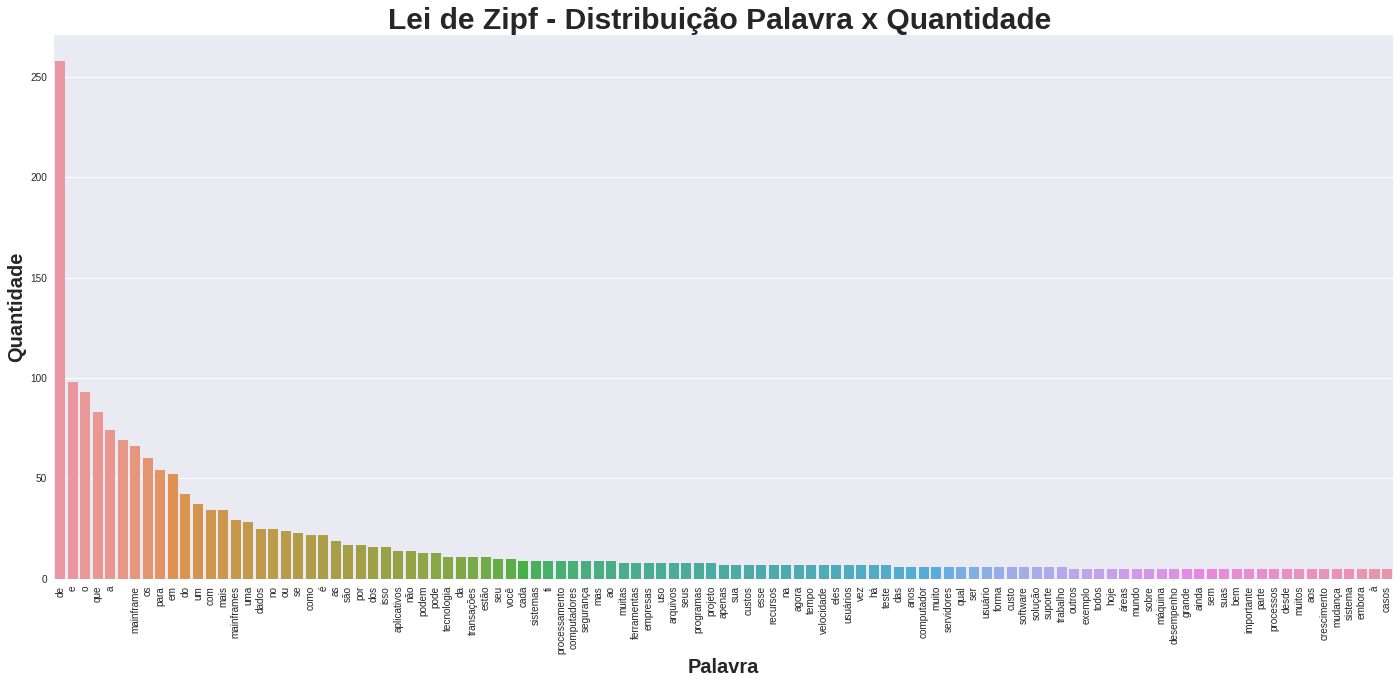

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(dicionario_quantidade_organizado.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90)
plt.title('Lei de Zipf - Distribuição Palavra x Quantidade ', fontsize=30,weight='bold')
plt.xlabel("Palavra", fontsize=20,weight='bold')
plt.ylabel("Quantidade", fontsize=20,weight='bold')

plt.show()

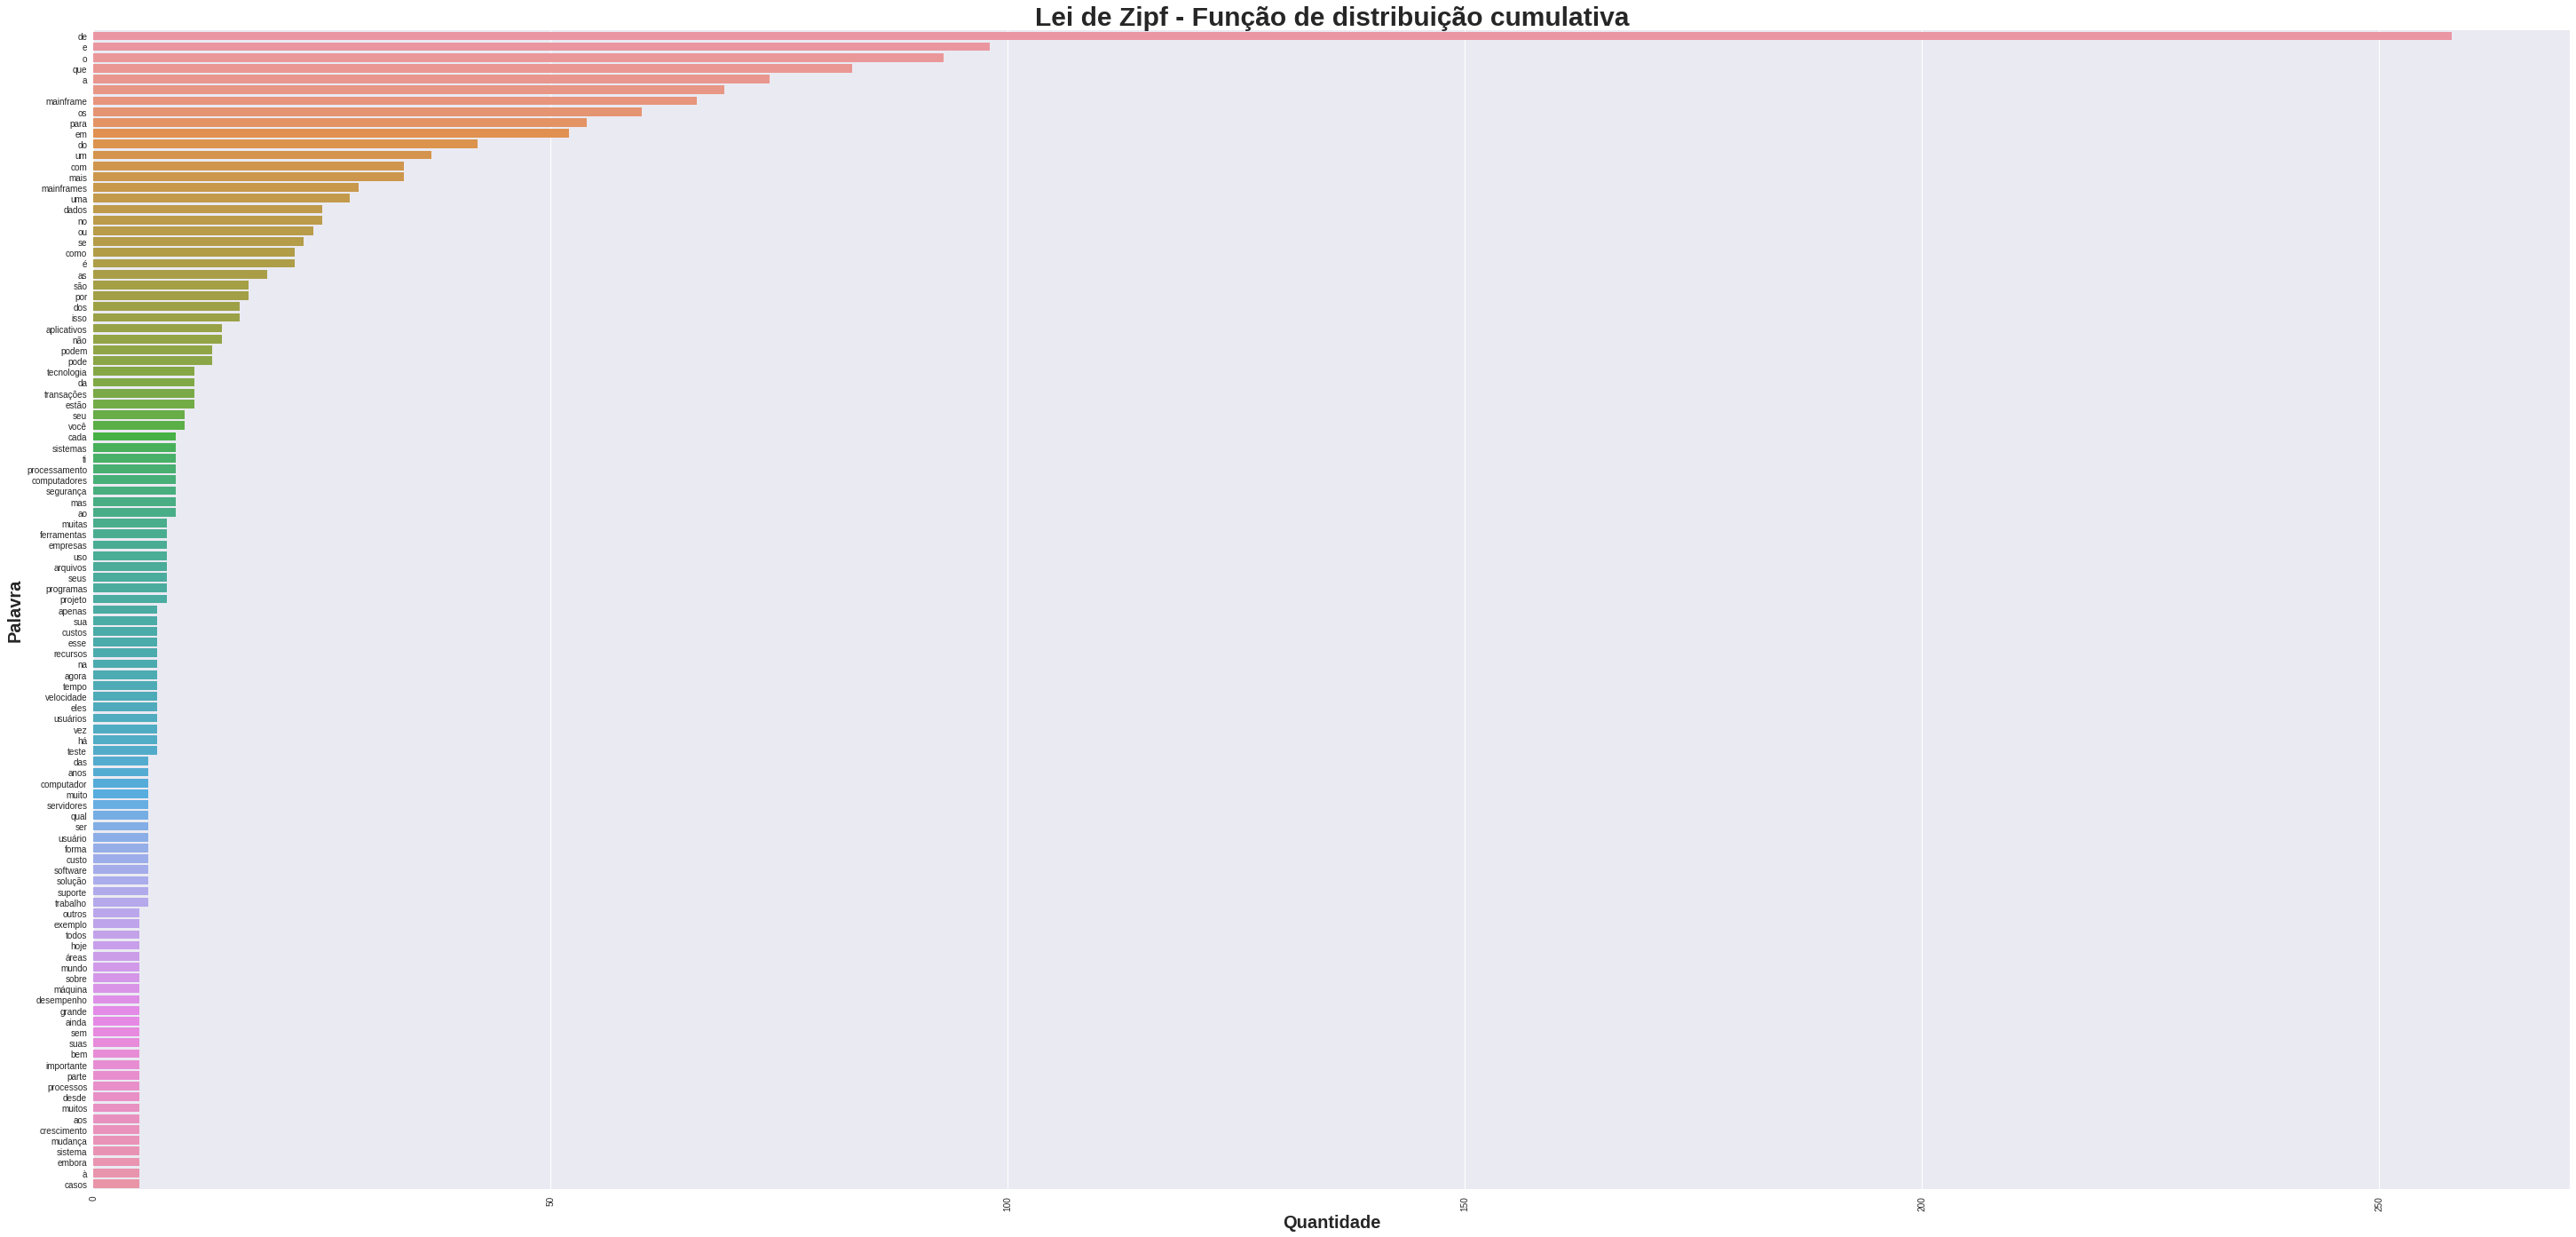

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(dicionario_quantidade_organizado.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(50,24))
mpl.style.use(['seaborn'])
sns.barplot(x=df['count'],y=df.word)
plt.xticks(rotation=90)
plt.title('Lei de Zipf - Função de distribuição cumulativa', fontsize=30,weight='bold')
plt.xlabel("Quantidade", fontsize=20,weight='bold')
plt.ylabel("Palavra", fontsize=20,weight='bold') 

plt.show()